In [1]:
# importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#### 1.	Download the dataset here: https://www.kaggle.com/sohier/calcofi and create one DataFrame for the bottle file and another for the cast file. Perform preprocessing on this dataset. You do not need to do all six types of preprocessing we discussed. For this dataset, 2-3 is all you need. 

In [2]:
# loading csv
bottle_df = pd.read_csv("bottle.csv",low_memory=False)
cast_df = pd.read_csv("cast.csv",low_memory=False)

In [3]:
# both data fram can be joined on cst_cnt
# However joning them is not serving the end goal 
# cast_df has many non numerical features
# as we are focusing on temp and salinity which is part of bottle_df, preprocessing focus in on bottle_df
display(bottle_df.shape)
cast_df.shape

(864863, 74)

(34404, 61)

In [4]:
# Delete columns containing either 25% or more than 25% NaN Values
perc = 25
min_count =  int(((100-perc)/100)*bottle_df.shape[0] + 1)
bottle_df.dropna(axis=1, thresh=min_count, inplace=True)
min_count =  int(((100-perc)/100)*cast_df.shape[0] + 1)
cast_df.dropna(axis=1, thresh=min_count, inplace=True)

display(bottle_df.shape)
cast_df.shape

(864863, 30)

(34404, 39)

In [5]:
bottle_df.drop((['Sta_ID','Depth_ID']), axis=1, inplace=True)
bottle_df.head()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,...,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
0,1,1,0,10.50,33.440,NaN,25.649,NaN,NaN,3,...,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,0
1,1,2,8,10.46,33.440,NaN,25.656,NaN,NaN,3,...,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,8
2,1,3,10,10.46,33.437,NaN,25.654,NaN,NaN,7,...,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,10
3,1,4,19,10.45,33.420,NaN,25.643,NaN,NaN,3,...,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,19
4,1,5,20,10.45,33.421,NaN,25.643,NaN,NaN,7,...,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,20


In [6]:
# Dropping rows where Temperature value is NaN
bottle_df.dropna(axis=0, subset=['T_degC'], inplace = True)

In [7]:
# Using ffill to replace remaning NaNs
bottle_df = bottle_df.fillna(method='ffill')

Standardization :Scaling to fit the data

As all the data in bottle_df is under varying scales, using StandardScaler to standardize data

In [8]:

scaler = StandardScaler()
bottle_df_scaled = pd.DataFrame(scaler.fit_transform(bottle_df),columns=bottle_df.columns)

In [9]:
bottle_df_scaled.head()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,...,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
0,-1.679376,-1.737746,-0.721124,-0.070615,-0.844583,NaN,-0.120817,NaN,NaN,-0.906676,...,-0.721127,-0.070620,-0.102090,-0.840552,-0.129381,0.103310,-1.101532,NaN,NaN,-0.718347
1,-1.679376,-1.737742,-0.695878,-0.080040,-0.844583,NaN,-0.114845,NaN,NaN,-0.906676,...,-0.695880,-0.080045,-0.111405,-0.840552,-0.120537,0.098028,-1.075914,NaN,NaN,-0.693369
2,-1.679376,-1.737738,-0.689566,-0.080040,-0.850996,NaN,-0.116551,NaN,NaN,1.224651,...,-0.689568,-0.080045,-0.111405,-0.846935,-0.120537,0.101197,-1.050297,NaN,NaN,-0.687125
3,-1.679376,-1.737734,-0.661163,-0.082397,-0.887336,NaN,-0.125936,NaN,NaN,-0.906676,...,-0.661165,-0.082401,-0.113734,-0.883110,-0.129381,0.114931,-0.999062,NaN,NaN,-0.659025
4,-1.679376,-1.737730,-0.658007,-0.082397,-0.885198,NaN,-0.125936,NaN,NaN,1.224651,...,-0.658009,-0.082401,-0.113734,-0.880982,-0.129381,0.113875,-0.999062,NaN,NaN,-0.655903


In [10]:
bottle_df_scaled.dropna(axis=1,inplace=True)
bottle_df.shape

(853900, 28)

#### 2.	Create a correlation matrix to see how the features are correlated. Describe your findings. Pay particular attention to what is correlated with water temperature. 

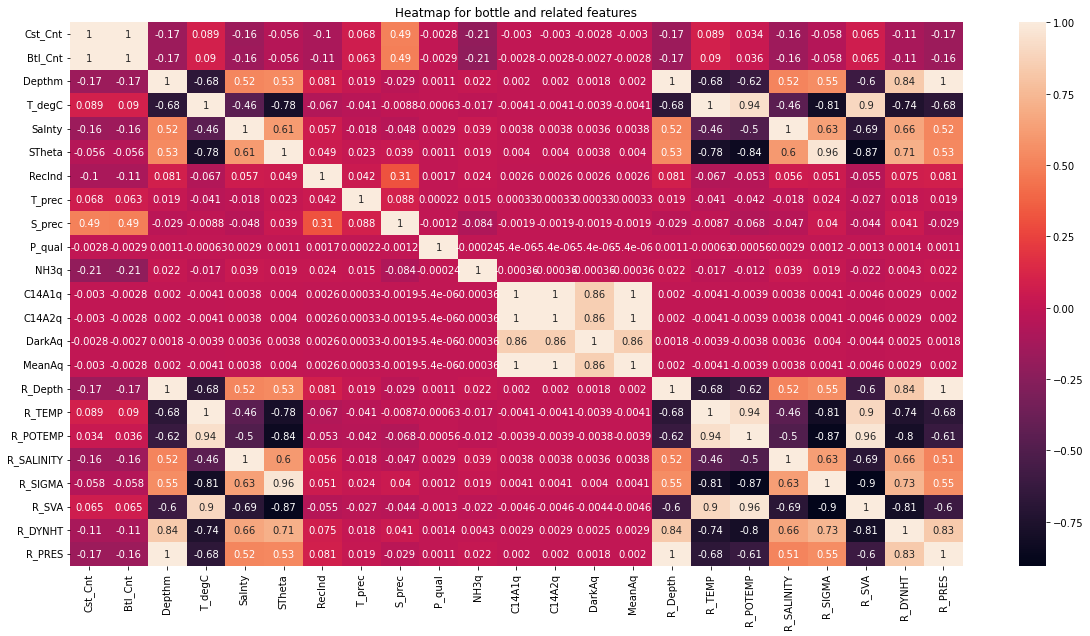

In [11]:
bottle_corr = bottle_df_scaled.corr()
plt.subplots(1,1,figsize=(20,10))
sns.heatmap(bottle_corr, annot=True)
plt.title("Heatmap for bottle and related features")
plt.show()

From the above heatmap we can make following concluions:
    - Temp, depth and Salinity have a direct correlation with reported temp, reported depth and reported Salinity. 
    Hence for further analysis taking one of these params should suffice.
    - Water temp and salinity have moderately negative correlation.
    - While water temo and depth have signifcantly negative correlation.
    - similarly water temp and density(Stheta) have signifcantly negative correlation.
    - Depth and pressure have direct positive correlation

#### 3.	Perform linear regression on the dataset to see if you can predict water temperature based on salinity

In [12]:
# performing linear regression startified sampling
X = np.array(bottle_df_scaled['Salnty']).reshape(-1,1)
y = np.array(bottle_df_scaled['T_degC']).reshape(-1,1)

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3 ,random_state=32)

# creating the model
regression_df = LinearRegression()
regression_df.fit(X_train, y_train)

y_pred = regression_df.predict(X_test)
y_pred

array([[-0.79614167],
       [-0.1505549 ],
       [ 0.5342177 ],
       ...,
       [ 0.25109999],
       [ 0.47171628],
       [ 0.30987875]])

#### 4.	Find your mean squared error and R2 values. Be sure to indicate what these tell you. You can import these from sklearn.metrics . 

In [13]:
# Calculating Mean Squared error
mean_squared_error(y_test, y_pred)

0.7878120322204788

Mean Squared error is used to find the average set of errors in a regression model prediction.

The (MSE) tells us how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line and squaring them.

\\[ \mathrm{MSE} = \frac{1}{n} \sum_{i=1}^{n}(Y_{i}-\hat{Y}_{i})^2 \\]

\\[ \mathrm{MSE}	=	mean squared error \\]

\\[{n}	=	no. of data points \\]

\\[Y_{i}	=	observed  values \\]

\\[\hat{Y}_{i}	=	predicted  values \\]


In [14]:
# caculating R2 values
r2_score(y_test, y_pred)

0.2083192695226619

R squared is called as the Coefficient of determination.

In case of Linear regression r2 is simply the square of the sample correlation coefficient test data and the predicted data.

In case of polynomial regression, R2 is the square of the coefficient of multiple correlation. 

In both such cases, the coefficient of determination normally ranges from 0 to 1.
An r2 value of 0.0 means that X does not help you predict Y. There is no linear relationship between X and Y, and the best-fit line is a horizontal line going through the mean of all Y values. When r2 equals 1.0, all points lie exactly on a straight line with no scatter. Knowing X lets you predict Y perfectly.

\\[ R^2 = 1 - \frac{RSS}{TSS} \\]
\\[ R^2	=	coefficient  of  determination \\]
\\[ RSS	=	sum of squares of residuals \\]
\\[ TSS	=	total sum of squares \\]



#### 5.	Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the predicted temperature values. 

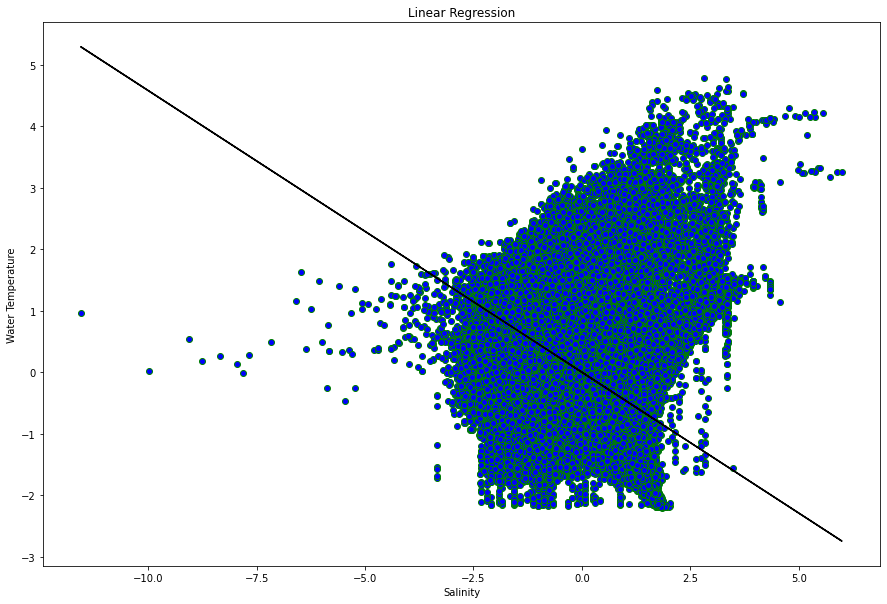

In [15]:
plt.subplots(1,1,figsize=(15,10))
plt.scatter(X_test, y_test, color = 'blue', edgecolor='green')
plt.plot(X_test, y_pred, color='black')
plt.title('Linear Regression')
plt.xlabel('Salinity')
plt.ylabel('Water Temperature')
plt.show()

#### 6.	Do some research on polynomial regression. Describe what it is any how it works in markdown. This article is useful https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/

Polynomial regression is a form of Linear regression where the Non-linear relationship between dependent and independent variables we add some degree to linear regression to convert it into Polynomial regression.

Linear regression  works when the relationship between the data is linear, but when we have non-linear data then Linear regression will not  be capable to draw a best-fit line and It fails in such conditions.
Here Polynomial regression helps to overcome this problem, which helps identify the curvilinear relationship between independent and dependent variables.

But using a high degree of polynomial tries to overfit the data and the smaller values of degree tries to underfit so we need to find the optimum value of a degree.

#### 7.	Perform polynomial regression on this same dataset. Train and validate your model as you did when you used linear regression. Mean squared error and R2 both apply here. 

In [16]:
from sklearn.preprocessing import PolynomialFeatures

X = np.array(bottle_df_scaled['Salnty']).reshape(-1,1)
y = np.array(bottle_df_scaled['T_degC']).reshape(-1,1)

poly = PolynomialFeatures(degree = 3,  include_bias=False)
X_poly = poly.fit_transform(X)
 
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)
y_poly_pred = lin2.predict(X_poly)
y_poly_pred

array([[0.45466604],
       [0.45466604],
       [0.45903243],
       ...,
       [0.49099426],
       [0.5037458 ],
       [0.53004652]])

In [17]:
# Calculating Mean Squared error
mean_squared_error(y, y_poly_pred)

0.71294505058443

In [18]:
# caculating R2 values
r2_score(y, y_poly_pred)

0.2870549494155703

#### 8.	Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the polynomial regression predicted temperature values. The resulting trend line should be curved. 

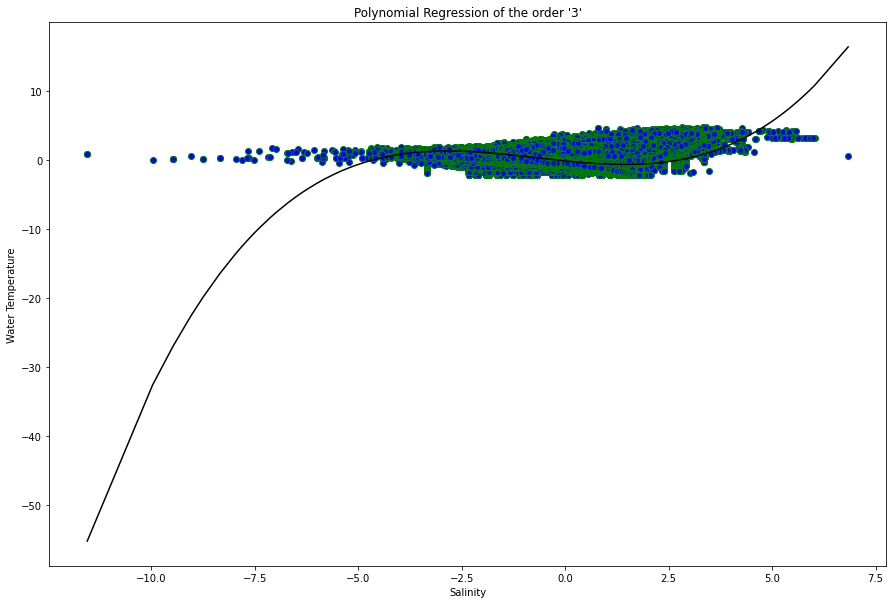

In [19]:
# Visualising the Polynomial Regression results
plt.subplots(1,1,figsize=(15,10))
plt.scatter(X, y, color = 'blue', edgecolor='green')
    
orders = np.argsort(X.ravel())    
    
plt.plot(X[orders], y_poly_pred[orders], color = 'black')
plt.title("Polynomial Regression of the order '3'")
plt.xlabel('Salinity')
plt.ylabel('Water Temperature')
 
plt.show()

### Datacamp's Preprocessing for Machine Learning in Python

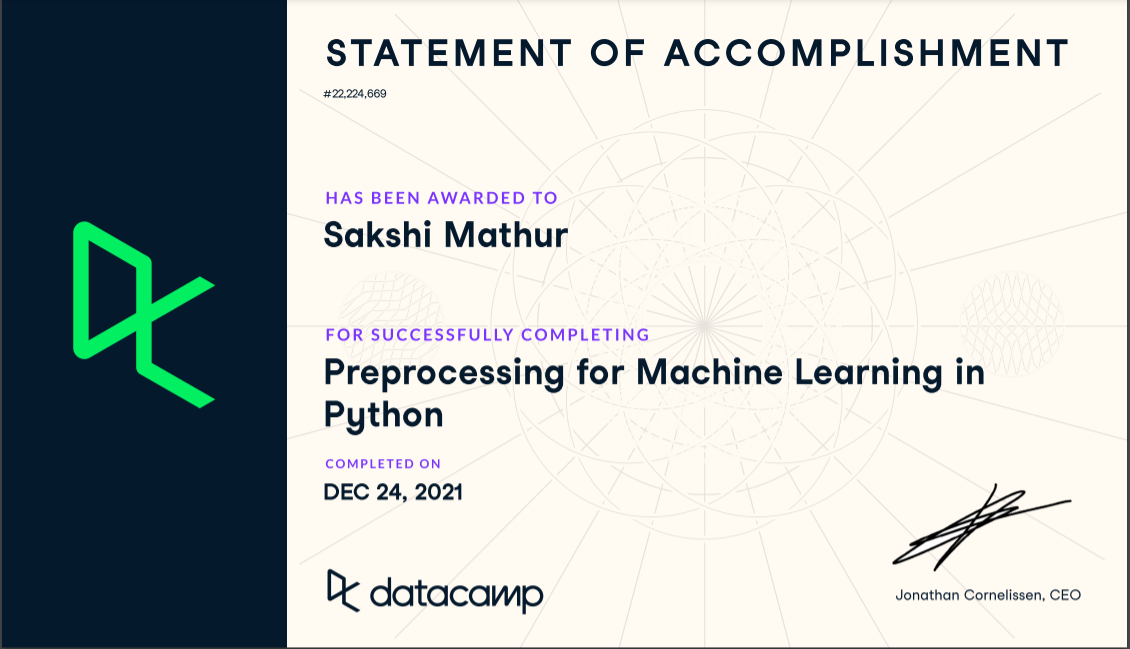

### Datacamp's Supervised Learning with scikit-learn